In [1]:
# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

start_date = '2010-11-01'
end_date = '2020-11-01'
ticker = 'GC=F'
df = yf.download(ticker, start_date, end_date)
df_orig=df

[*********************100%***********************]  1 of 1 completed


In [4]:
df['HL_PCT']=(df['High']-df['Low'])/df['Adj Close'] *100.0
df['PCT_change']= (df['Adj Close']-df['Open'])/df['Open']*100.0
df = df[['Adj Close','HL_PCT','PCT_change','Volume']]
date = df.index
df.head()

,Adj Close,HL_PCT,PCT_change,Volume
Date,,,,
2010-11-01,1350.199951,0.711013,-0.742490,40
2010-11-02,1356.400024,0.095846,-0.029483,17
2010-11-03,1337.099976,2.370799,-1.058166,135
2010-11-04,1382.699951,1.728504,1.030248,109
2010-11-05,1397.300049,1.417022,0.474588,109


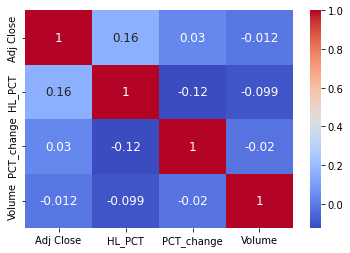

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

dfcorr = df.corr(method="pearson")
sns.heatmap(dfcorr, annot=True,annot_kws={"size":12},cmap="coolwarm")
plt.show()

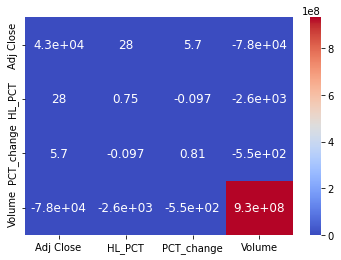

In [6]:
dfcov =df.cov()
sns.heatmap(dfcov, annot=True,annot_kws={"size":12},cmap="coolwarm")
plt.show()

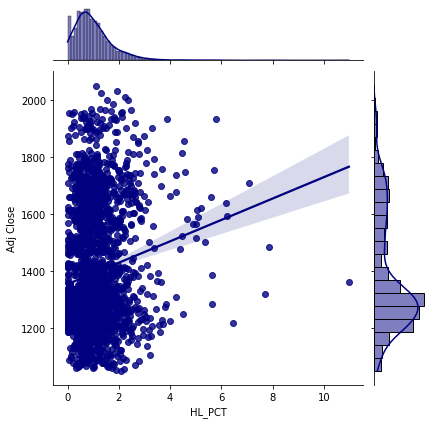

In [7]:
sns.jointplot(x="HL_PCT",y="Adj Close",data=df,kind="reg",color="navy")
plt.ylabel("Adj Close")
plt.xlabel("HL_PCT")
plt.show()

In [ ]:
sns.jointplot(x="Corr",y="Adj Close",data=xy,kind="reg",color="red")
plt.ylabel("Adj Close")
plt.xlabel("Corr")
plt.show()

In [ ]:
sns.jointplot(x="Corr",y="Adj Close",data=xy,kind="reg",color="red")
plt.ylabel("Adj Close")
plt.xlabel("Corr")
plt.show()

In [11]:
import pandas as pd
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(dfcov)
eigenvalues = pd.DataFrame(eigenvalues)
eigenvectors = pd.DataFrame(eigenvectors)
eigen = pd.concat([eigenvalues,eigenvectors],axis=1)
eigen.index = df.columns
eigen.columns = ("Eigen values","Adj Close","HL_PCT","PCT_change","Volume")
eigen

,Eigen values,Adj Close,HL_PCT,PCT_change,Volume
Adj Close,9.317731e+08,-8.421302e-05,1.000000,-0.000608,0.000245
HL_PCT,4.324455e+04,-2.802901e-06,0.000643,0.834911,-0.550385
PCT_change,6.540212e-01,-5.850194e-07,0.000130,0.550385,0.834911
Volume,8.758558e-01,1.000000e+00,0.000084,0.000003,-0.000001


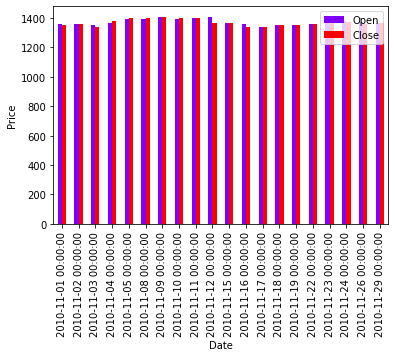

In [12]:
df_orig[["Open","Close"]].head(20).plot(kind='bar',cmap="rainbow")
plt.ylabel("Price")
plt.show()

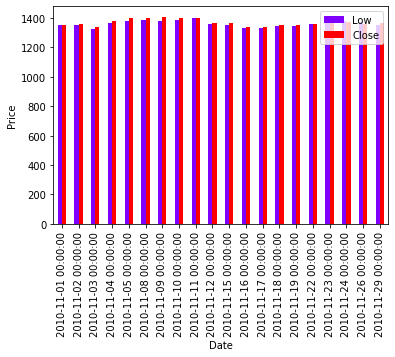

In [13]:
df_orig[["Low","Close"]].head(20).plot(kind="bar",cmap="rainbow")
plt.ylabel("Price")
plt.show()

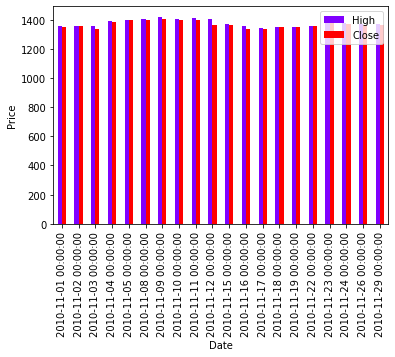

In [14]:
df_orig[['High','Close']].head(20).plot(kind='bar',cmap="rainbow")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Volume')

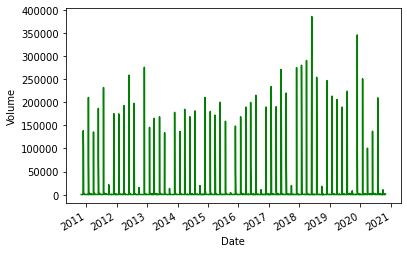

In [15]:
df_orig.Volume.plot(color="green")
plt.ylabel("Volume")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
def get_val_score(model):
    scores = cross_val_score(model, x_train, y_train,
    scoring="r2")
    print("CV mean: ", np.mean(scores))
    print("CV std: ", np.std(scores))
    print("\n")

In [ ]:
get_val_score(lm)

In [ ]:
lm.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True, False]}
grid_model = GridSearchCV(estimator=lm,param_grid=param_grid,n_jobs=-1)
grid_model.fit(x_train,y_train)

In [ ]:
print("Best score: ", grid_model.best_score_,
      "Best parameters: ", grid_model.best_params_)

In [ ]:
lm = LinearRegression(copy_X= True,
                      fit_intercept= True,
                      normalize= False)
lm.fit(x_train,y_train)

In [ ]:
lm.intercept_

In [ ]:
lm.coef_

In [ ]:
y_pred = lm.predict(x_test)
pd.DataFrame(y_pred,columns=["Forecast"])

In [ ]:
num_samples = df.shape[0]
df['Forecast'] = np.nan
df['Forecast'][int(0.9*num_samples):num_samples]=y_pred
df['Adj Close'].plot(color="navy")
df['Forecast'].plot(color="red")
plt.legend(loc="best")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test,y_pred)
EV = metrics.explained_variance_score(y_test,y_pred)
MGD = metrics.mean_gamma_deviance(y_test,y_pred)
MPD = metrics.mean_poisson_deviance(y_test,y_pred)
lmmodelevaluation = [[MAE,MSE,RMSE,R2,EV,MGD,MPD]]
lmmodelevaluationdata = pd.DataFrame(lmmodelevaluation,
                                     index = ["Values"],
                                     columns = ["MAE",
                                                "MSE",
                                                "RMSE",
                                                "R2",
                                                "Explained variance score",
                                                "Mean gamma deviance",
                                                "Mean Poisson deviance"]).transpose()

lmmodelevaluationdata